# MOVIE ANALYSIS USING PYTHON

#### Data Exploration, Correlation and Visualization

In [2]:
# IMPORTING NECESSARY LIBRARIES

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# READING DATA

df = pd.read_csv(r'C:\Users\Archana\Downloads\movies.csv')

In [3]:
# REVIEWING DATA

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# CHECKING FOR MISSING DATA

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(percent_missing*100)))

name - 0.0%
rating - 1.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 28.0%
gross - 2.0%
company - 0.0%
runtime - 0.0%


In [5]:
# CHECKING FOR DATA TYPES

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
# CONVERTING COLUMNS FROM FLOAT TO INT

df = df[~df['votes'].isnull()]
df = df[~df['budget'].isnull()]
df = df[~df['gross'].isnull()]
df = df[~df['runtime'].isnull()]

df['votes'] = df['votes'].astype(int)
df['budget'] = df['budget'].astype(int)
df['gross'] = df['gross'].astype(int)
df['runtime'] = df['runtime'].astype(int)

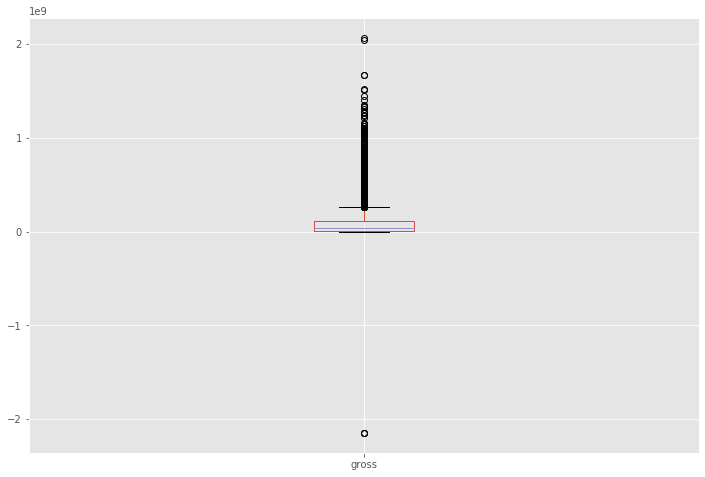

In [7]:
# IDENTIFYING OUTLIERS

df.boxplot(column=['gross'])

In [8]:
# DROP DUPLICATES IF ANY

df.drop_duplicates()
df['company'].drop_duplicates().sort_values(ascending = False)

7129                                thefyzz
5664                            micro_scope
4007                               i5 Films
6793                             i am OTHER
6420                                   erbp
                       ...                 
2929                          1492 Pictures
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
633                                     NaN
Name: company, Length: 1482, dtype: object

In [9]:
# SORTING DATA 

df.sort_values(by=['gross'], inplace = False, ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134
3203,Trojan War,PG-13,Comedy,1997,"October 1, 1997 (Brazil)",5.7,5800,George Huang,Andy Burg,Will Friedle,United States,15000000,309,Daybreak,85
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,-2147483648,Twentieth Century Fox,162
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,-2147483648,Twentieth Century Fox,194


### BUDGET  VS GROSS USING SEABORN

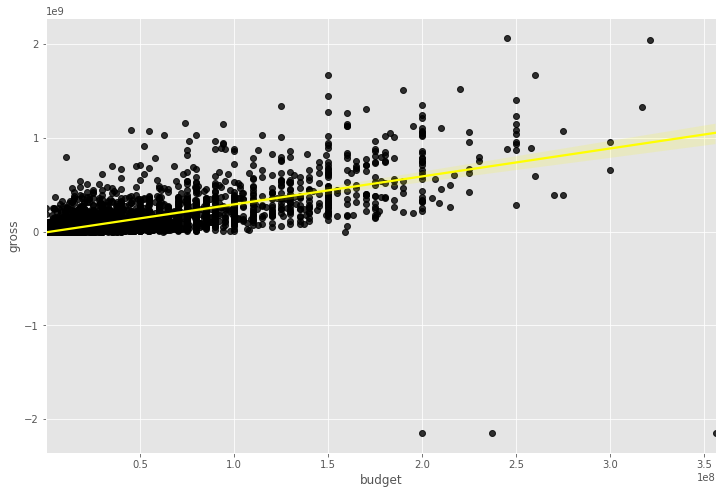

In [10]:
# BUDGET VS GROSS USING SEABORN

sns.regplot(x="budget", y="gross", data=df, scatter_kws={"color":"Black"}, line_kws={"color":"yellow"})

### SCORE VS GROSS USING SEABORN

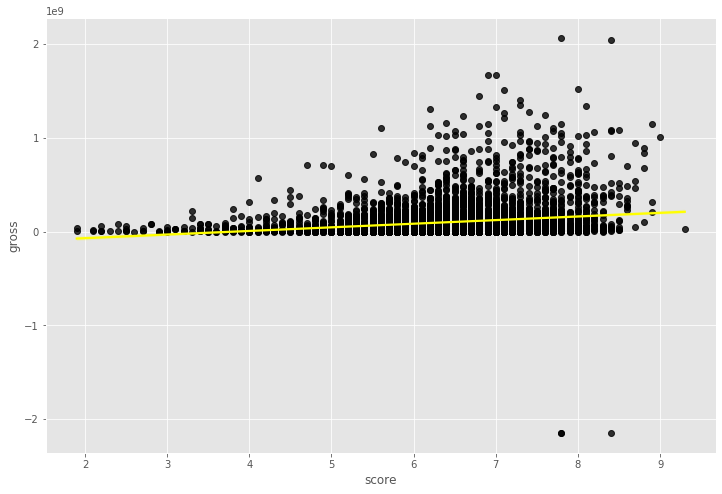

In [11]:
# SCORE VS GROSS USING SEABORN

sns.regplot(x="score", y="gross", data=df, scatter_kws={"color":"Black"}, line_kws={"color":"yellow"})

### CORRELATION MATRIX BETWEEN ALL NUMERIC VALUES


In [13]:
df.corr(method ='pearson') # Another methods kendall spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.055391,0.205852,0.327793,0.267668,0.074203
score,0.055391,1.000000,0.473789,0.071821,0.200681,0.414580
votes,0.205852,0.473789,1.000000,0.440035,0.550837,0.352437
budget,0.327793,0.071821,0.440035,1.000000,0.669435,0.318595
gross,0.267668,0.200681,0.550837,0.669435,1.000000,0.223576
runtime,0.074203,0.414580,0.352437,0.318595,0.223576,1.000000


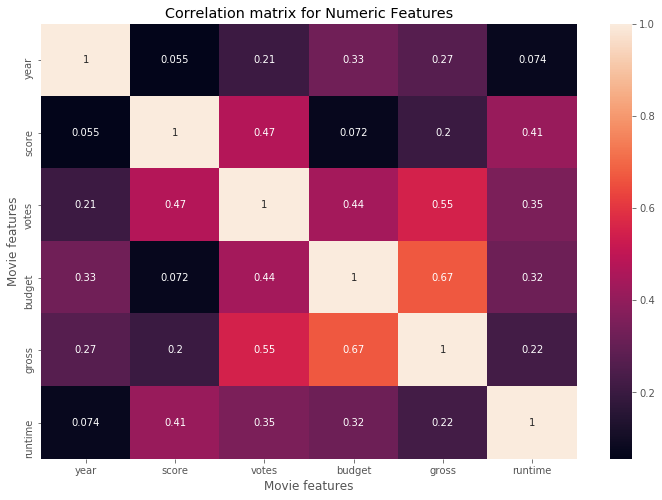

In [16]:
correlation_matrix = df.corr(method ='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [12]:
# USING NUMERIZED FUNCTION

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4705,6,6,1980,1308,8.4,927000,1800,2840,700,46,19000000,46998772,1432,146
1,3942,6,1,1980,1131,5.8,65000,1581,1160,215,47,4500000,58853106,454,104
2,3653,4,0,1980,1363,8.7,1200000,759,1822,1161,47,18000000,538375067,949,124
3,205,4,4,1980,1131,7.7,221000,891,1416,1478,47,3500000,83453539,1114,88
4,734,6,4,1980,1174,7.3,108000,721,352,272,47,6000000,39846344,1089,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,416,6,0,2020,907,6.6,140000,17,2397,1819,47,90000000,426505244,454,124
7649,3568,4,0,2020,715,6.5,102000,854,2316,148,47,85000000,319715683,1114,99
7650,1156,4,1,2020,907,5.6,53000,1814,2835,1474,47,175000000,245487753,1403,101
7651,3991,4,1,2020,760,6.8,42000,296,2096,641,6,135000000,111105497,12,100


In [18]:
df_numerized.corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.023011,0.009647,0.024418,-0.005889,0.014981,0.012923,0.013698,0.011576,-0.007111,-0.024563,0.023695,0.014397,0.021216,0.010801
rating,-0.023011,1.000000,0.128076,0.022705,0.018821,0.059517,0.009241,0.014848,-0.006881,0.003740,0.020160,-0.186890,-0.167903,-0.082189,0.133239
genre,0.009647,0.128076,1.000000,-0.072815,0.021617,0.033805,-0.136573,-0.009300,0.017790,0.002638,-0.010768,-0.368932,-0.239021,-0.073306,-0.060186
year,0.024418,0.022705,-0.072815,1.000000,-0.001405,0.055391,0.205852,-0.036942,-0.024794,-0.032788,-0.066730,0.327793,0.267668,-0.013061,0.074203
released,-0.005889,0.018821,0.021617,-0.001405,1.000000,0.046343,0.028998,0.003342,0.008619,0.015370,-0.017204,0.019896,0.025702,-0.002928,0.008619
score,0.014981,0.059517,0.033805,0.055391,0.046343,1.000000,0.473789,0.005577,0.013130,0.009139,-0.044624,0.071821,0.200681,0.021055,0.414580
votes,0.012923,0.009241,-0.136573,0.205852,0.028998,0.473789,1.000000,-0.010196,-0.005301,-0.017134,0.042173,0.440035,0.550837,0.119367,0.352437
director,0.013698,0.014848,-0.009300,-0.036942,0.003342,0.005577,-0.010196,1.000000,0.262973,0.036289,0.011107,-0.009341,-0.017646,-0.007337,0.018082
writer,0.011576,-0.006881,0.017790,-0.024794,0.008619,0.013130,-0.005301,0.262973,1.000000,0.019255,0.022076,-0.039448,-0.026699,-0.002652,-0.016671
star,-0.007111,0.003740,0.002638,-0.032788,0.015370,0.009139,-0.017134,0.036289,0.019255,1.000000,-0.010140,-0.021283,-0.011811,0.015087,0.012439


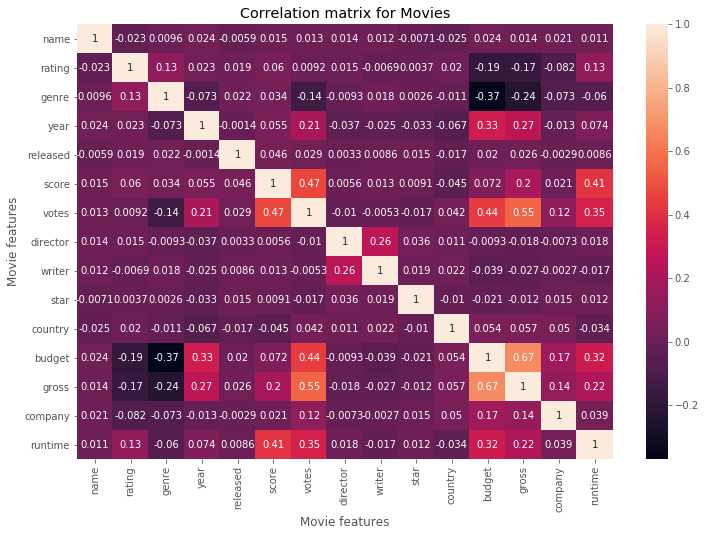

In [19]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [20]:
# USING FACTORIZE FUNCTION

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.167369,0.028253,0.965585,0.966189,-0.020512,0.295355,0.724954,0.792197,0.694892,0.098517,0.288415,0.967394,0.535454,0.049122
rating,0.167369,1.000000,-0.115405,0.176882,0.168703,0.035468,0.093557,0.095448,0.127061,0.114996,0.001712,0.202042,0.169265,-0.024824,0.032838
genre,0.028253,-0.115405,1.000000,0.031442,0.031046,-0.025650,-0.011166,0.037392,0.033341,0.045602,-0.002927,0.019691,0.032135,0.014970,-0.001107
year,0.965585,0.176882,0.031442,1.000000,0.996545,-0.015093,0.322068,0.747380,0.812030,0.719127,0.095319,0.318471,0.995831,0.537892,0.056058
released,0.966189,0.168703,0.031046,0.996545,1.000000,-0.019930,0.311350,0.750398,0.809534,0.719807,0.097223,0.309077,0.997892,0.546096,0.049772
score,-0.020512,0.035468,-0.025650,-0.015093,-0.019930,1.000000,-0.041229,-0.006762,-0.021718,0.014688,0.016169,-0.006563,-0.015859,-0.009416,0.011792
votes,0.295355,0.093557,-0.011166,0.322068,0.311350,-0.041229,1.000000,0.186398,0.223030,0.180918,-0.021962,0.357159,0.304168,0.007020,0.126804
director,0.724954,0.095448,0.037392,0.747380,0.750398,-0.006762,0.186398,1.000000,0.717631,0.636196,0.095624,0.123000,0.751272,0.483568,-0.027831
writer,0.792197,0.127061,0.033341,0.812030,0.809534,-0.021718,0.223030,0.717631,1.000000,0.626315,0.099373,0.207039,0.811052,0.477898,0.022642
star,0.694892,0.114996,0.045602,0.719127,0.719807,0.014688,0.180918,0.636196,0.626315,1.000000,0.100104,0.137576,0.720628,0.441842,0.033018


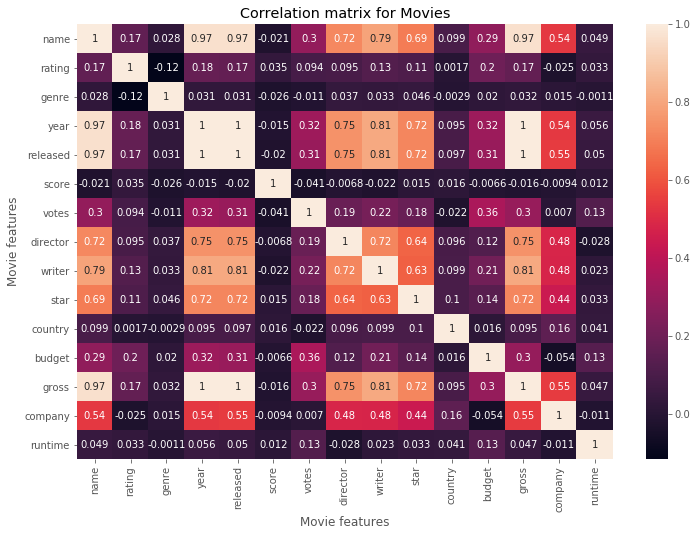

In [21]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

#### CORRELATION PAIRS (TAKING NUMERIZED VALUE)

In [13]:
correlation_mat = df_numerized.corr()

correlation_pairs = correlation_mat.unstack()

print(correlation_pairs)

name     name        1.000000
         rating     -0.023011
         genre       0.009647
         year        0.024418
         released   -0.005889
                       ...   
runtime  country    -0.033554
         budget      0.318595
         gross       0.223576
         company     0.038752
         runtime     1.000000
Length: 225, dtype: float64


In [14]:
sorted_pairs = correlation_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

budget   genre     -0.368932
genre    budget    -0.368932
gross    genre     -0.239021
genre    gross     -0.239021
rating   budget    -0.186890
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64


In [24]:
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

votes     gross       0.550837
gross     votes       0.550837
budget    gross       0.669435
gross     budget      0.669435
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64


### RATING VS GROSS USING SEABORN

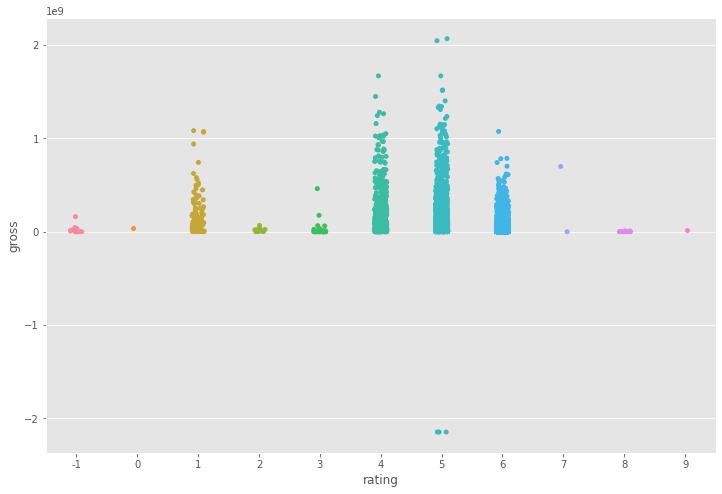

In [25]:
sns.stripplot(x="rating", y="gross", data=df)

In [3]:
# GROUPING BY COMPANY, YEAR AND GROSS

df.groupby(['company', 'year'])[["gross"]].sum()

,,gross
company,year,
"""DIA"" Productions GmbH & Co. KG",2003,44350926.0
"""Weathering With You"" Film Partners",2019,193457467.0
.406 Production,1996,10580.0
1+2 Seisaku Iinkai,2000,1196218.0
10 West Studios,2010,814906.0
...,...,...
i am OTHER,2015,17986781.0
i5 Films,2001,10031529.0
iDeal Partners Film Fund,2013,506303.0


In [4]:
# GROUPING BY COUNTRY AND GROSS

df.groupby('country')[["gross"]].sum()

,gross
country,
Argentina,1.362436e+08
Aruba,1.031992e+07
Australia,3.008909e+09
Austria,1.046004e+08
Belgium,4.048799e+07
Brazil,9.904728e+07
Canada,6.075292e+09
Chile,3.911703e+07
China,8.789430e+09


In [5]:
# GROUPING BY GENRE AND GROSS

df.groupby('genre')[["gross"]].sum()

,gross
genre,
Action,2.434359e+11
Adventure,4.591660e+10
Animation,8.014205e+10
Biography,2.072958e+10
Comedy,9.717547e+10
Crime,2.135545e+10
Drama,5.715065e+10
Family,2.157897e+09
Fantasy,1.664501e+09


### TOP 15 COMPANIES BY GROSS REVENUE 

In [6]:
CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

### TOP 15 COUNTRIES BY GROSS REVENUE

In [7]:
CompanyGrossSum = df.groupby('country')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

country
United States     483458762880
United Kingdom     48950197427
China               8789429801
France              8499480043
New Zealand         6354731946
Germany             6218590787
Canada              6075291696
Japan               3668029755
Australia           3008909112
Spain               1658676204
Hong Kong           1655228751
India               1600905212
South Korea         1363273943
Ireland              733484414
Italy                666842209
Name: gross, dtype: int64

### TOP GENRE BY GROSS REVENUE

In [8]:
CompanyGrossSum = df.groupby('genre')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

genre
Action       243435855754
Comedy        97175468462
Animation     80142045796
Drama         57150648537
Adventure     45916596693
Crime         21355448322
Biography     20729581801
Horror        14543329602
Family         2157897417
Mystery        2023670554
Fantasy        1664501135
Thriller        323223113
Sci-Fi          260489866
Romance         188394999
Western          32025886
Name: gross, dtype: int64

### YEAR VS GROSS REVENUE

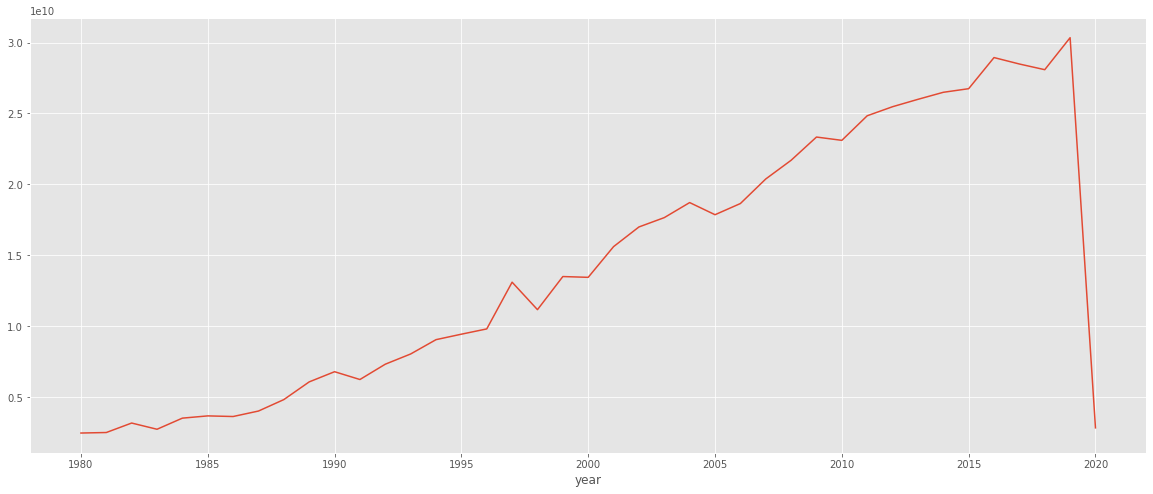

In [9]:
yearvsgross = df.groupby('year')["gross"].sum()
yearvsgross.plot(figsize=(20,8))

### BUDGET VS GROSS REVENUE USING SCATTER PLOT ON MATPLOTLIB

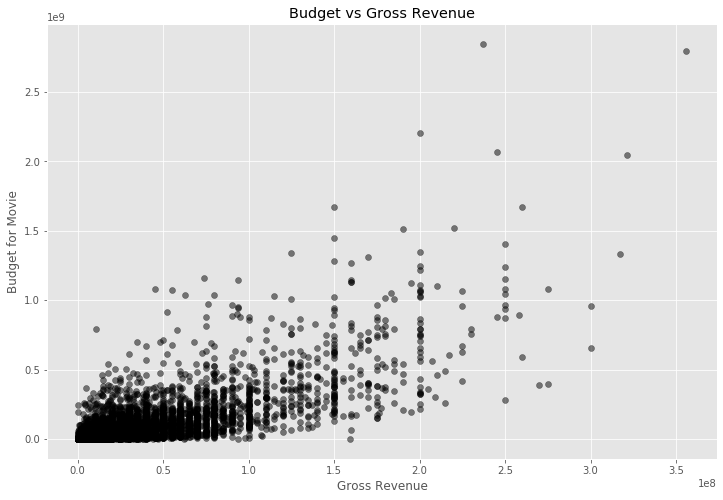

In [10]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5, color='Black')

plt.title('Budget vs Gross Revenue')

plt.xlabel('Gross Revenue')

plt.ylabel('Budget for Movie')

plt.show()

### MOVIE RUNTIME USING DISTPLOT ON SEABORN

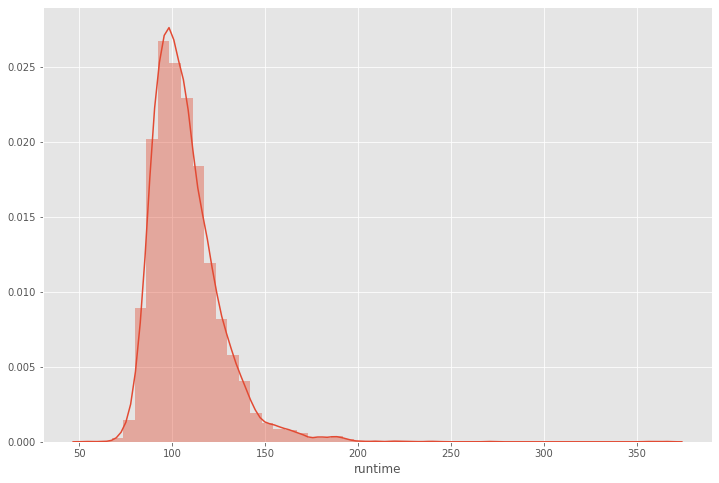

In [11]:
sns.distplot(df[(df['runtime'] < 500) & (df['runtime'] > 0)]['runtime'])

### GENRE COUNT USING COUNTPLOT ON SEABORN

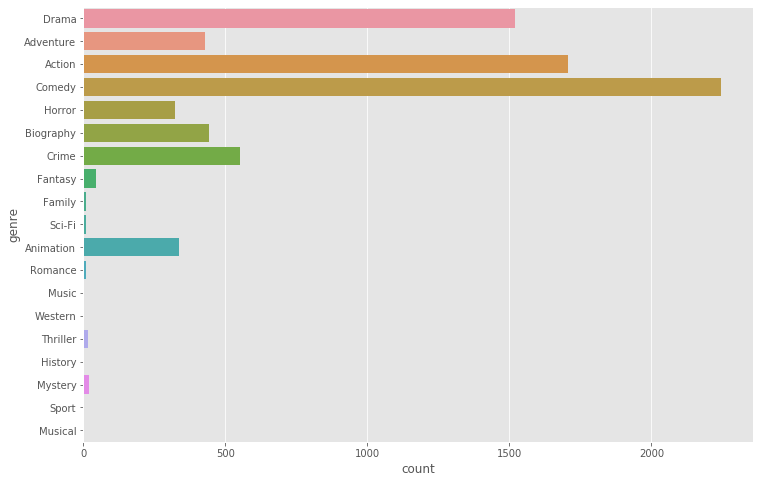

In [12]:
sns.countplot(y=df['genre'], data=df)

### RATING COUNT USING COUNTPLOT ON SEABORN

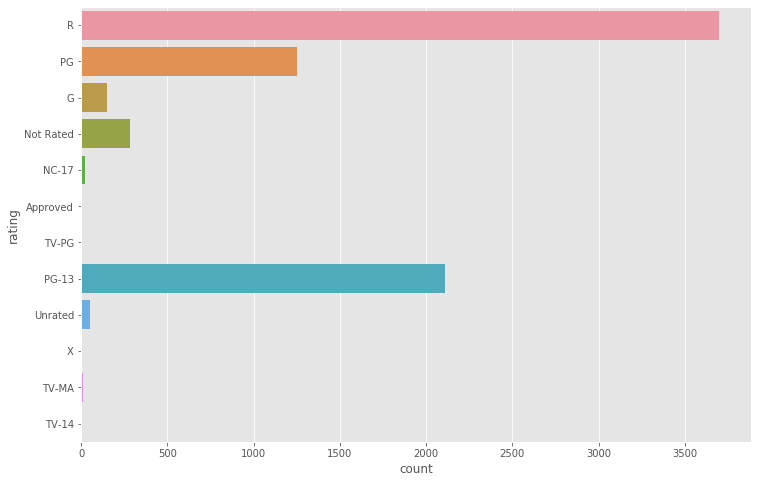

In [13]:
sns.countplot(y=df['rating'], data=df)

### GENRE VS GROSS

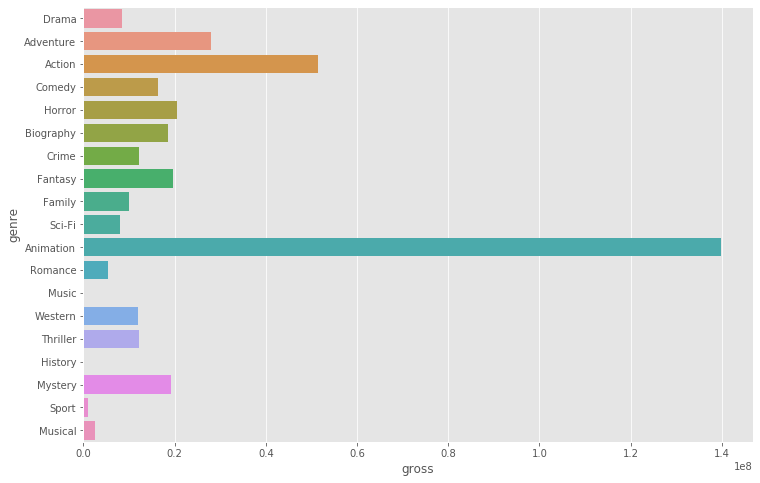

In [14]:
sns.barplot(y=df['genre'], x=df['gross'], data=df, estimator=np.median, ci=0)

### GENRE VS BUDGET

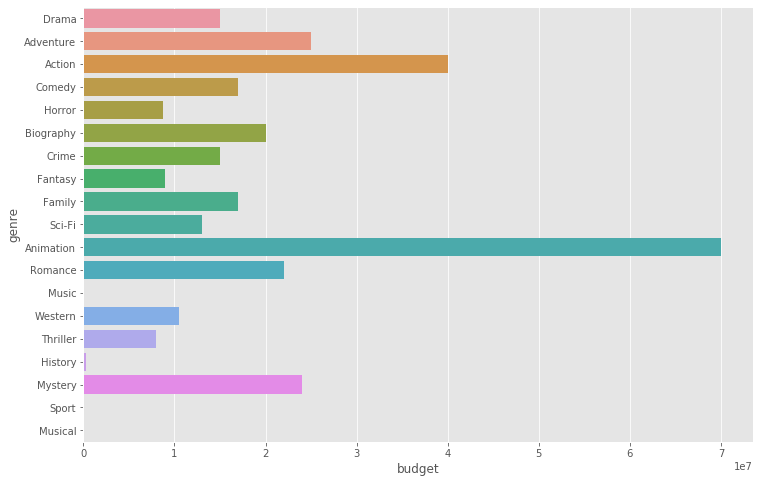

In [15]:
sns.barplot(y=df['genre'], x=df['budget'], data=df, estimator=np.median, ci=0)